**Check GPU**

In [ ]:
!nvidia-smi

Wed Aug  6 15:23:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   70C    P8             14W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Install Ultralytics**

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.8 MB/s eta 0:00:00


In [2]:
import os
import shutil
import random
from IPython.display import Image

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

**Drive Mount**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Creating Train-Val Split**

In [ ]:
trainImagePath = '/content/drive/MyDrive/Final_Defence/data/images/train/'
trainLabelPath = '/content/drive/MyDrive/Final_Defence/data/labels/train/'
valImagePath = '/content/drive/MyDrive/Final_Defence/data/images/val/'
valLabelPath = '/content/drive/MyDrive/Final_Defence/data/labels/val/'
testPath = '/content/drive/MyDrive/Final_Defence/data/test/'

**Split the dataset**

In [ ]:
def train_test_split(path,neg_path=None, split=0.2):
  print("-------- PROCESS STARTED ---------")

  files = list(set([name[:-4] for name in os.listdir(path)]))   ## Removing duplicate names data...

  print(f">>> This folder has a total number of {len(files)} images <<<")
  random.seed(42)
  random.shuffle(files)

  test_size = int(len(files) * split)
  train_size = len(files) - test_size

  ## Createing requird directories

  os.makedirs(trainImagePath, exist_ok= True)
  os.makedirs(trainLabelPath, exist_ok= True)
  os.makedirs(valImagePath, exist_ok= True)
  os.makedirs(valLabelPath, exist_ok= True)

  ## Copying images to train folder

  for filex in tqdm(files[:train_size]):
    if filex == 'classes':
      continue
    shutil.copy2(path + filex + '.png', f"{trainImagePath}/" + filex + '.png')
    shutil.copy2(path + filex + '.txt', f"{trainLabelPath}/" + filex + '.txt')

  print(f">>>> Training data created with 80% split {len(files[:train_size])} images <<<<")

  if neg_path:
    neg_images = list(set([name[:4] for name in os.listdir(neg_path)]))   ## Removing duplicate names data

    for filex in tqdm(neg_images):
      shutil.copy2(neg_path + filex + '.png', f"{trainImagePath}/" + filex + '.png')

    print(f">>>> Total {len(neg_images)} negative images added to the training data <<<<")
    print(f">>>> Total training data created with {len(files[:train_size]) + len(neg_images)} images <<<<")


  ## Copying images to validation folder

  for filex in tqdm(files[train_size:]):
    if filex == 'classes':
       continue

    shutil.copy2(path + filex + '.png', f"{valImagePath}/" + filex + '.png')
    shutil.copy2(path + filex + '.txt', f"{valLabelPath}/" + filex + '.txt')

  print(f">>>> Testing data created with 80% split {len(files[train_size:])} images <<<<")

  print(">>>> TASK COMPLETE <<<<")


### for label_tag
train_test_split('/content/drive/MyDrive/Final_Defence/raw_data/')    ## Without negative images

-------- PROCESS STARTED ---------
>>> This folder has a total number of 1368 images <<<


  0%|          | 0/1095 [00:00<?, ?it/s]

>>>> Training data created with 80% split 1095 images <<<<


  0%|          | 0/273 [00:00<?, ?it/s]

>>>> Testing data created with 80% split 273 images <<<<
>>>> TASK COMPLETE <<<<


**Create dataset.yaml file**

In [ ]:
%cd /content/drive/MyDrive/yolo/yolov8/data/

!touch dataset.yaml
!ls /content/drive/MyDrive/yolo/yolov8/data/

/content/drive/MyDrive/yolo/yolov8/data
coco128-seg.yaml  demo.yaml  labels  yolov8x-seg.yaml
dataset.yaml	  images     test


**Train Detection model**

In [ ]:
%cd /content/drive/MyDrive/Final_Defence/yolov8/

/content/drive/MyDrive/Final_Defence/yolov8


In [4]:
# Check ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.0/235.7 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolov8l.pt imgsz=640 data=/content/drive/MyDrive/Final_Defence/data/dataset.yaml epochs=100 batch=8 project=/content/drive/MyDrive/Final_Defence/yolov8 name=exp1

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Final_Defence/data/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

**Checking all files inside the Train Folder**

In [ ]:
!ls /content/drive/MyDrive/Final_Defence/yolov8/exp1/

args.yaml			 labels.jpg	       train_batch2.jpg
BoxF1_curve.png			 results.csv	       val_batch0_labels.jpg
BoxP_curve.png			 results.png	       val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxR_curve.png			 train_batch12330.jpg  val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch12331.jpg  val_batch2_labels.jpg
confusion_matrix.png		 train_batch12332.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch1.jpg      weights


**Confusion Matrix**

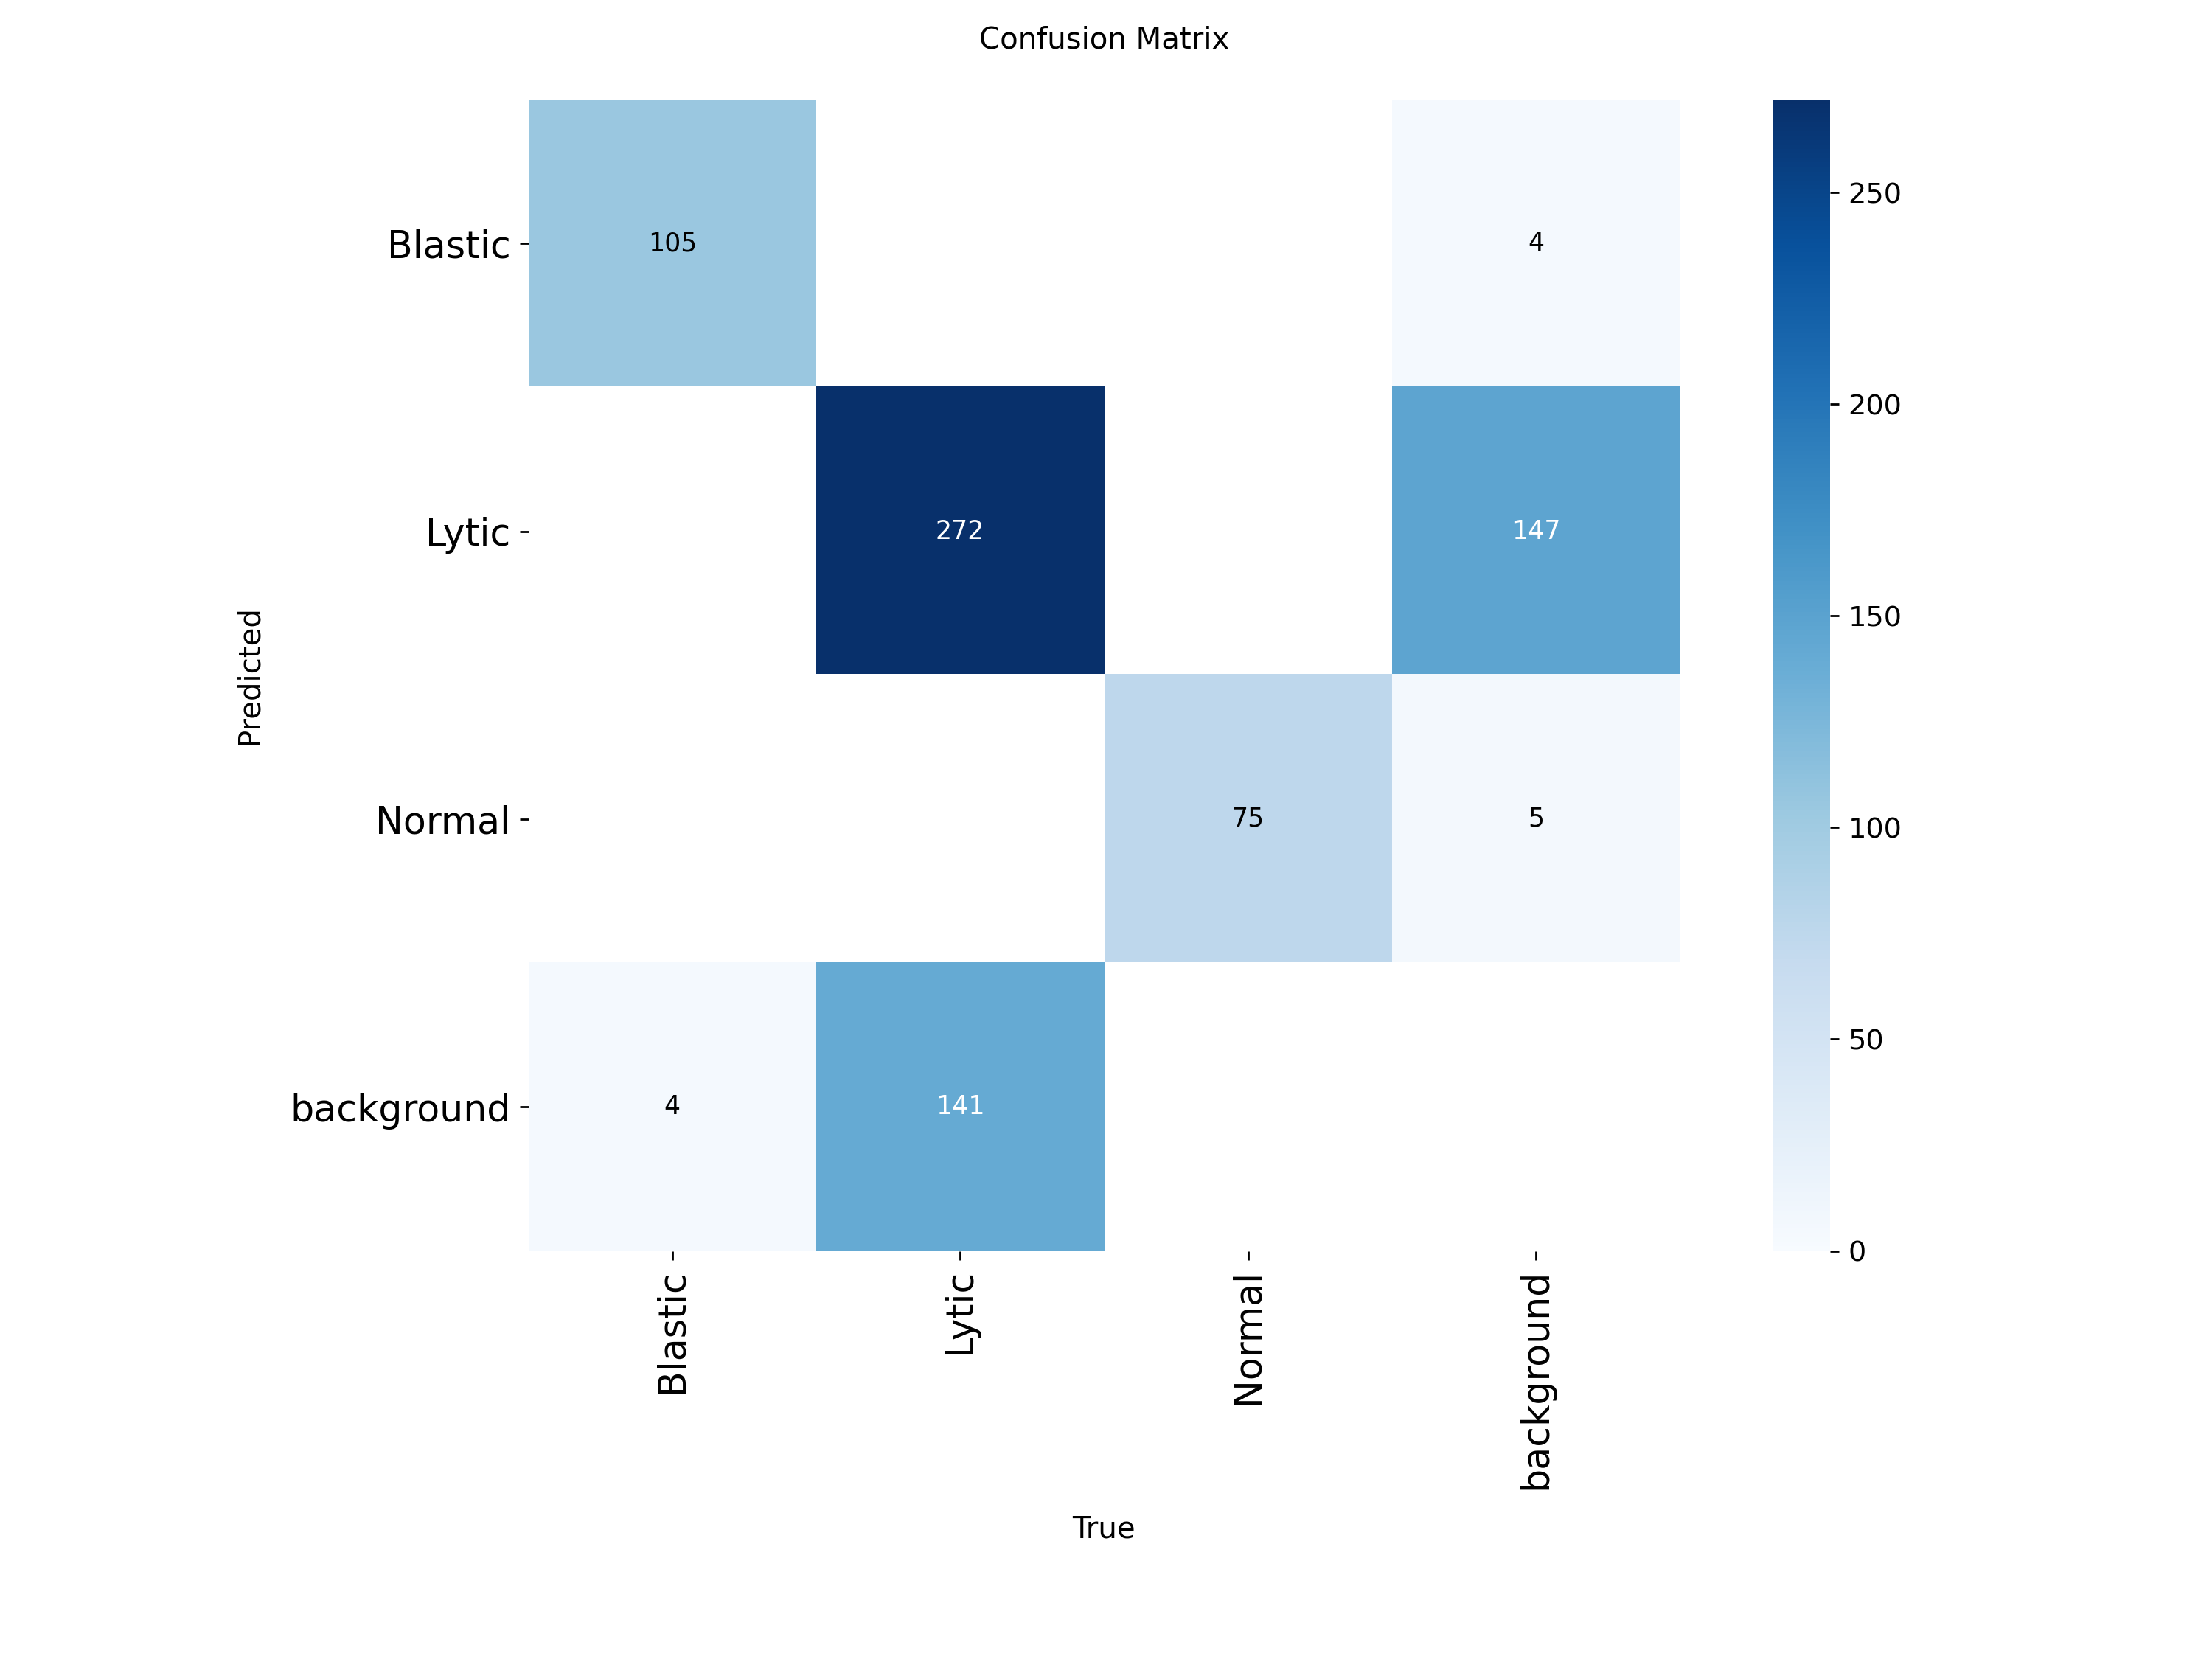

In [ ]:
Image(filename=f'/content/drive/MyDrive/Final_Defence/yolov8/exp1/confusion_matrix.png', width=700)

**Results**

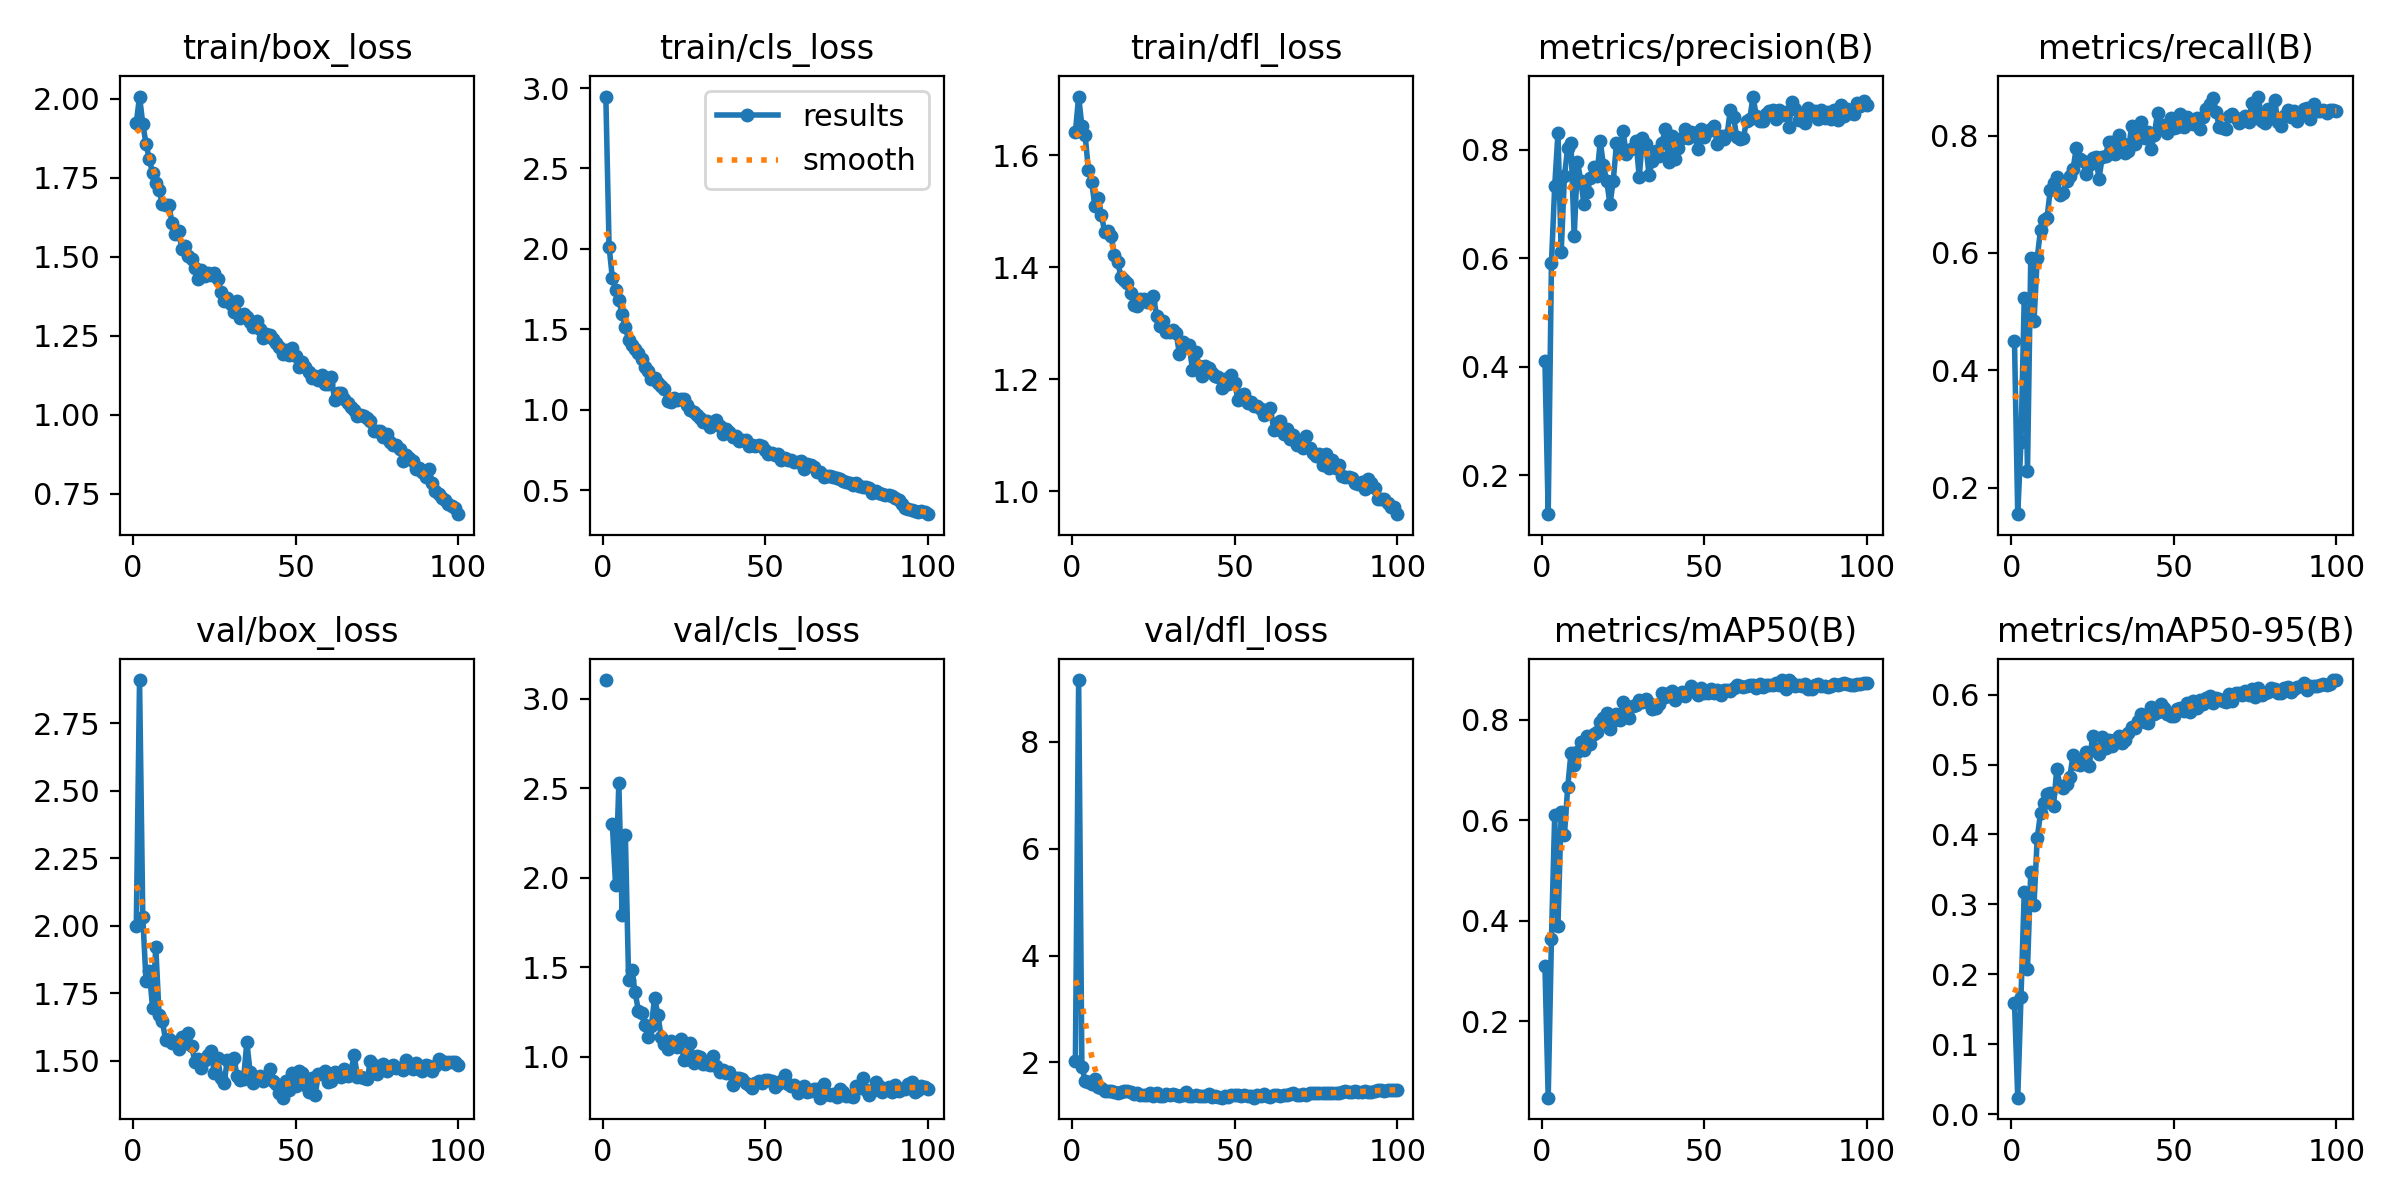

In [ ]:
Image(filename=f'/content/drive/MyDrive/Final_Defence/yolov8/exp1/results.png', width=800)

**Validation Batch Prediction**

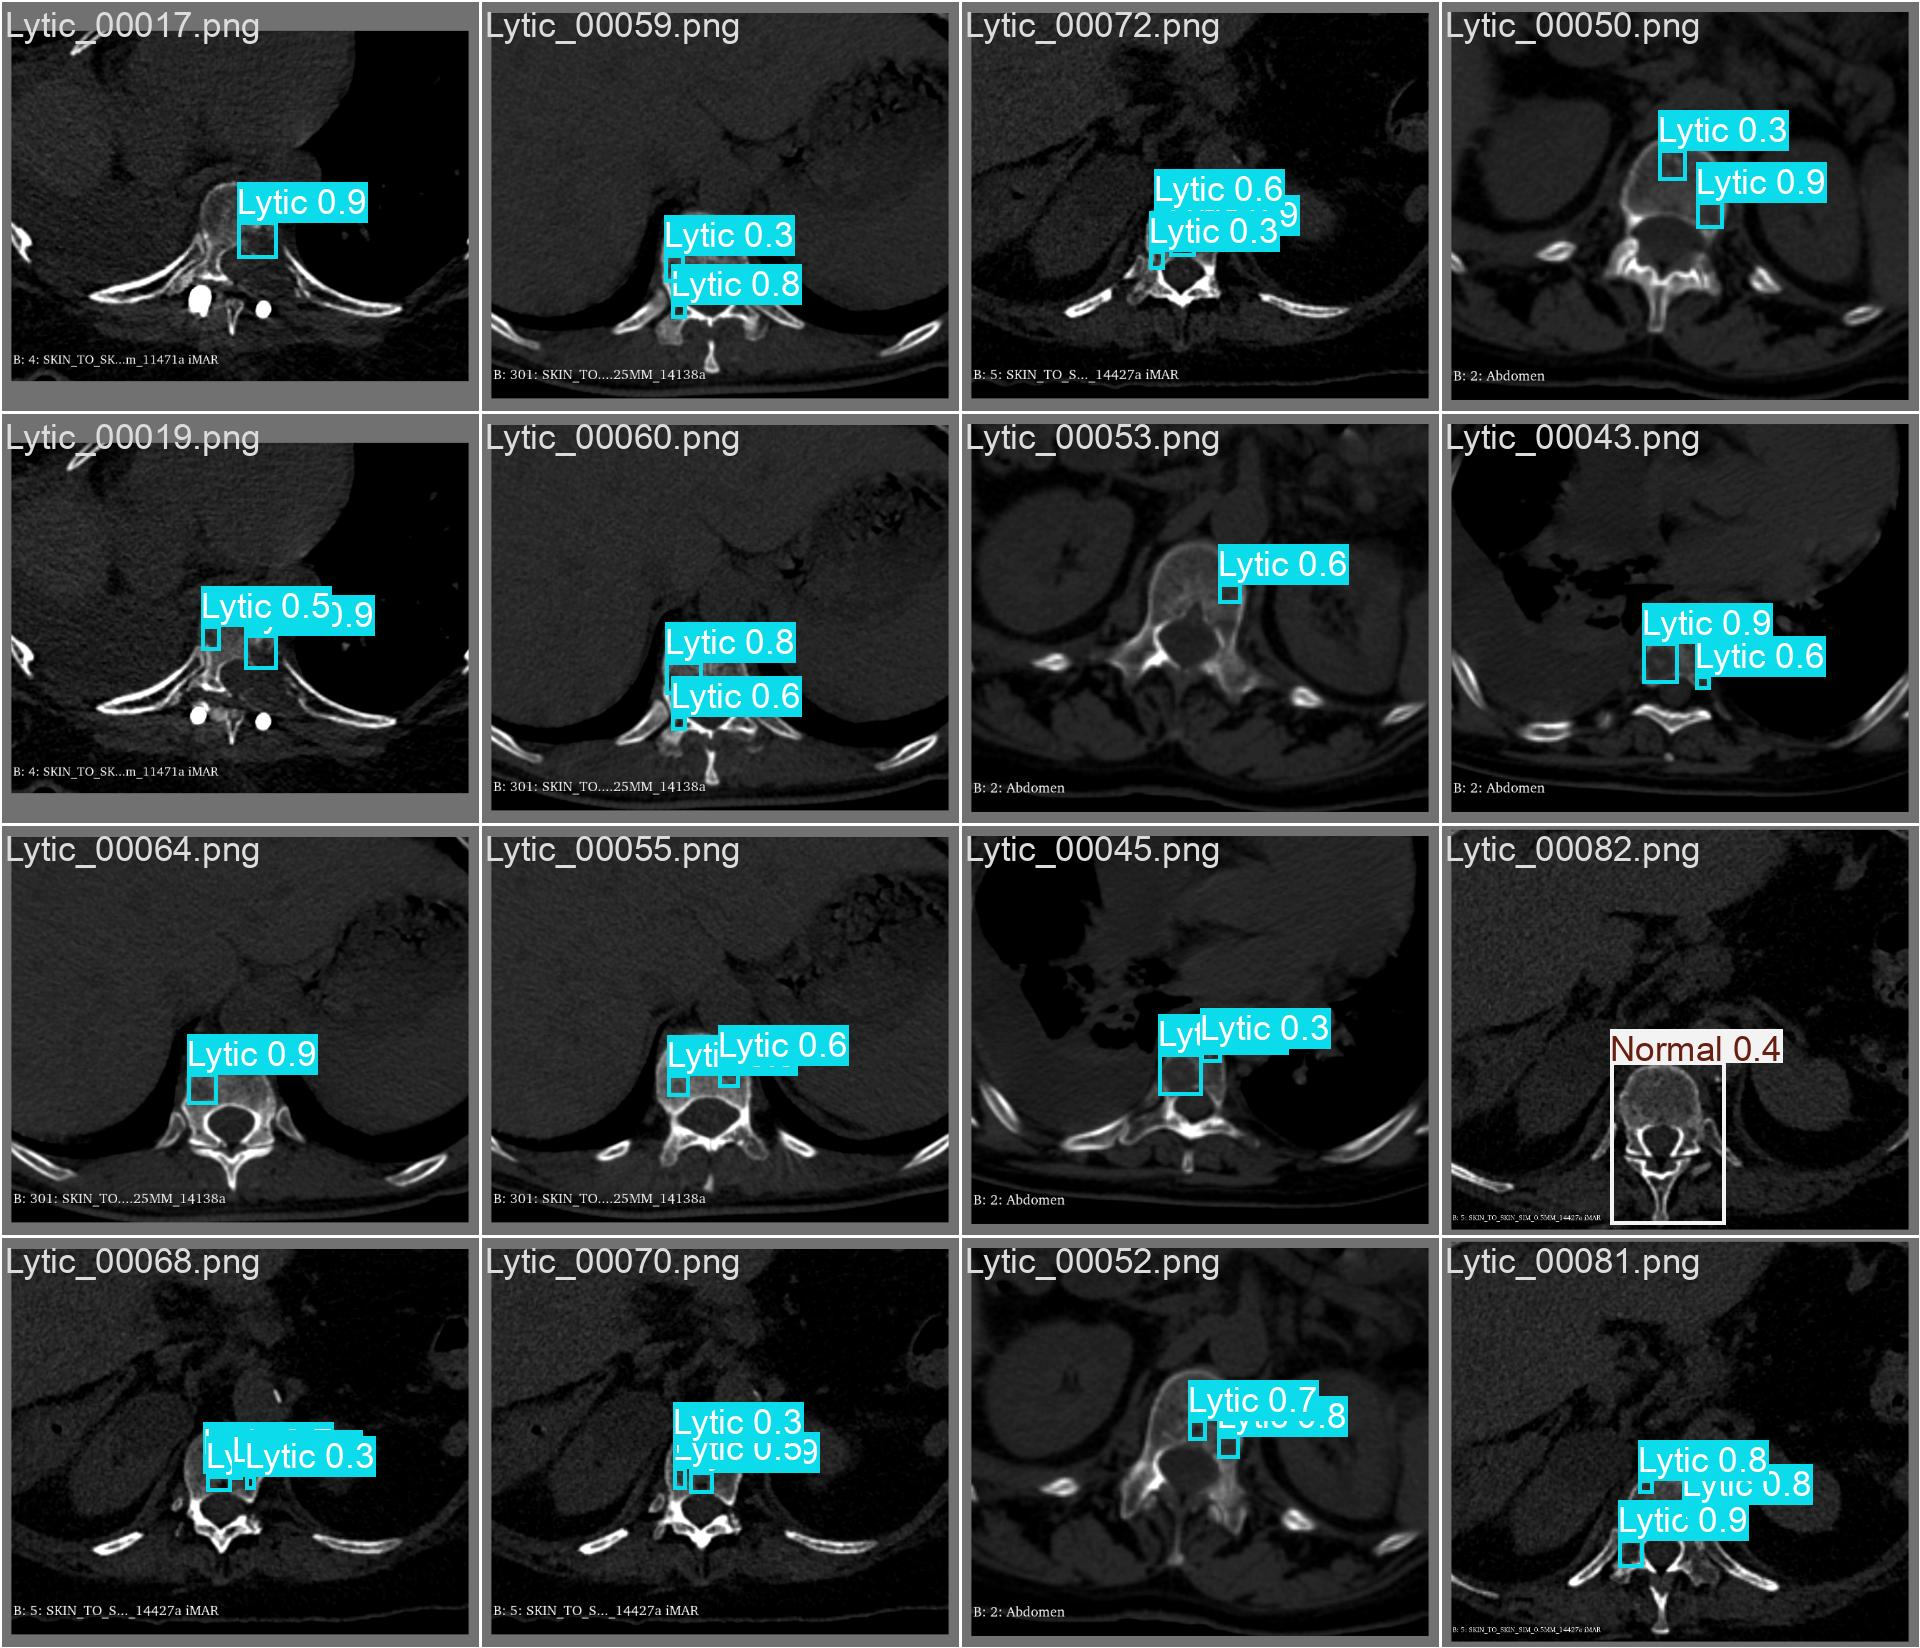

In [ ]:
Image(filename=f'/content/drive/MyDrive/Final_Defence/yolov8/exp1/val_batch0_pred.jpg', width=800)

**Detect Validation**

In [ ]:
%cd /content/drive/MyDrive/Research_Dataset/yolo/BrainTumor/yolov8/exp4

/content/drive/MyDrive/Research_Dataset/yolo/BrainTumor/yolov8/exp4


In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Research_Dataset/yolo/BrainTumor/yolov8/exp4/weights/best.pt data=/content/drive/MyDrive/Research_Dataset/yolo/BrainTumor/data/dataset.yaml

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/drive/MyDrive/Research_Dataset/yolo/BrainTumor/data/labels/val.cache... 180 images, 0 backgrounds, 0 corrupt: 100% 180/180 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:10<00:00,  1.16it/s]
                   all        180        180      0.788      0.823      0.838      0.506
                Glioma        180         59      0.593      0.617      0.571      0.284
            Meningioma        180         59      0.932      0.932      0.976      0.705
             Pituitary        180         62      0.841      0.919      0.967      0.529
Speed: 2.3ms preprocess, 35.8ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


**Detect Prediction**

In [ ]:
%cd /content/drive/MyDrive/Research_Dataset/yolo/braintumor/yolov8/exp2

/content/drive/MyDrive/Research_Dataset/yolo/braintumor/yolov8/exp2


**Detection Output**

**Segment Prediction**

In [ ]:
%cd /content/drive/MyDrive/yolo/yolov8/yolov8_models/experiment

/content/drive/MyDrive/yolo/yolov8/yolov8_models/experiment


In [ ]:
!yolo task=segment mode=predict model=yolov8x-seg.pt conf=0.55 source=/content/drive/MyDrive/yolo/yolov8/data/test save=True

100% 137M/137M [00:02<00:00, 54.0MB/s]
2023-04-05 08:59:03.832391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 08:59:04.784810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.62 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs

image 1/6 /content/drive/MyDrive/yolo/yolov8/data/test/6ty_f_50_we.jpg: 384x640 12 persons, 76.4ms
image 2/6 /content/drive/MyDrive/yolo/yolov8/data/test/6ty_f_65_we.jpg: 384x640 11 persons, 55.6ms
image 3/6 /content/drive/MyDrive/yolo/yolov8/data/test/6ty_f_80_54r.jpg: 384x640 12 persons, 55.7ms
image 4/6 /content/drive/MyDrive/yolo/yolov8

In [5]:
from ultralytics import YOLO
import os

# -----------------------------
# Paths
# -----------------------------
MODEL_PATH = '/content/drive/MyDrive/Final_Defence/yolov8/exp1/weights/best.pt'
DATA_YAML  = '/content/drive/MyDrive/Final_Defence/data/dataset.yaml'
RESULT_DIR = '/content/drive/MyDrive/Final_Defence/yolov8'

os.makedirs(RESULT_DIR, exist_ok=True)

# -----------------------------
# Load trained YOLO model
# -----------------------------
model = YOLO(MODEL_PATH)

# -----------------------------
# Test set evaluation with custom save path
# -----------------------------
results = model.val(
    data=DATA_YAML,
    split='test',
    save=True,        # save prediction images
    save_txt=True,    # save predicted bounding boxes
    save_conf=True,   # save confidence scores
    project=RESULT_DIR,  # custom folder
    name='test_results'  # subfolder inside RESULT_DIR
)

Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,921 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 1.5±2.6 ms, read: 50.4±109.6 MB/s, size: 873.8 KB)
val: Scanning /content/drive/MyDrive/Final_Defence/data/labels/test.cache... 136 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 136/136 179831.4it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 0.70it/s 12.8s
                   all        136        288      0.959      0.937      0.957      0.801
               Blastic         44         63      0.995          1      0.995      0.844
                 Lytic         51        184      0.895       0.81       0.88      0.638
                Normal         41         41      0.986          1      0.995      0.922
Speed: 2.6ms preprocess, 32.0ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to /content